<div style="text-align: right;font-weight:bold;font-size:large">Till Pfaff<br>3789265</div>

Full code available at https://github.com/till-robert/cs1_seminar/tree/main/task15

### 15. Relaxation time of the magnetization of the 1D Ising model
Study the relaxation time of the magnetization of the 1D Ising model
for the Glauber update algorithm. To this end use your computer code
of problem 13 for *periodic* boundary consitions and start a chain of
$L = 100$ spins in an initial configuration where all spins are pointing
up ($s_i = +1, i = 1, ..., L$). Determine after each of the first $200$ sweeps
(that is after $L$ randomly chosen spin-flip proposals) the magnetization
per spin, $m = (1/L) \sum^L_{i=1} s_i\,.$ Since this curve still shows strong fluctuations, average the whole experiment over $10\,000$ replicas (using different
random numbers). This curve should show an exponentially decaying
behavior, $m(t) = m(0) \, e^{−t/\tau_{\mathrm{relax}}}\,,$ from which the relation time $\tau_{\mathrm{relax}}$ can
be read off, that depends on the chosen simulation temperature.

**a)** Run the simulation at any rate for the case $k_B T \, / \, J = 1$ and consider also the chain lengths $L = 50, 20, 10,$ and $2.$ Determine for
each case $\tau_{\mathrm{relax}}$ through a linear fit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exponential(x,tau):
    return np.exp(-x/tau)

In [2]:
!mkdir -p out && g++ -O3 task15.cpp  -o task15 && ./task15

^C


In [4]:
x = np.arange(200)
L = [2,10,20,50,100]
avg_M_series = np.loadtxt("out/avg_M_timeseries_beta1.txt")

L = M(0) = 2	tau = 26.338
L = M(0) = 10	tau = 27.438
L = M(0) = 20	tau = 27.313
L = M(0) = 50	tau = 27.689
L = M(0) = 100	tau = 28.052

τ_avg = 27.366


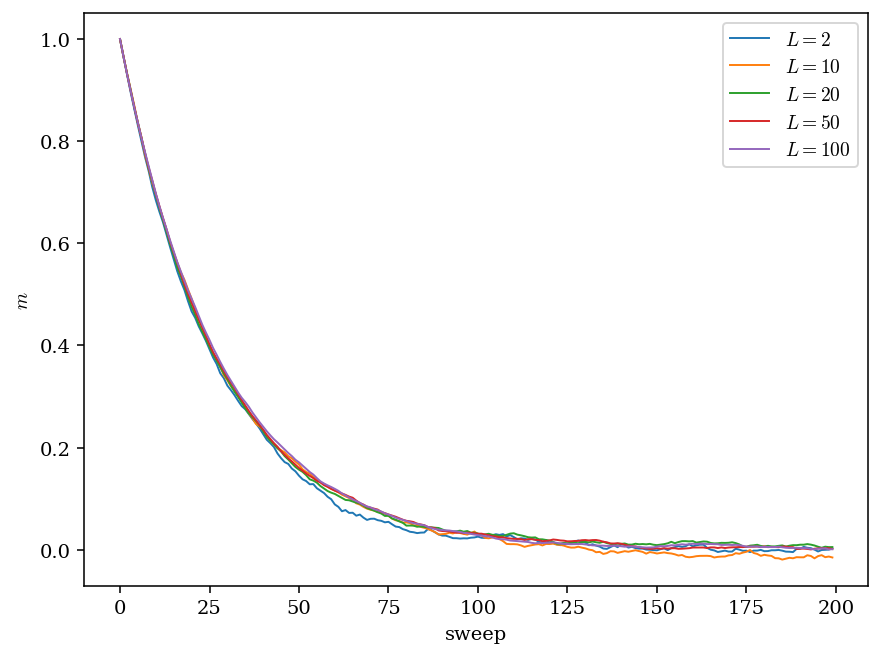

In [ ]:
tau = []
for L_val,series in zip(L,avg_M_series):
    curr_tau , = curve_fit(exponential,x,series/L_val)[0]
    tau.append(curr_tau)
    print(f"L = M(0) = {L_val}\ttau = {curr_tau:.3f}")
    plt.plot(x,series/L_val,label=rf"$L = {L_val}$", lw=1)

print(f"\nτ_avg = {sum(tau)/len(tau):.3f}")

plt.xlabel("sweep")
plt.ylabel("$m$")
plt.legend()
plt.show()

**b)** “Play” with the temperature in approximately the range $2/3 \leq k_B T \, / \, J \leq 2.$


In [ ]:
tau = np.zeros((7,5))
betas = [0.8,1,1.2,1.4,1.6,1.8,2]
for i,beta in enumerate(betas):
    avg_M_series = np.loadtxt(f"out/avg_M_timeseries_beta{i}.txt")
    for j,(L_val,series) in enumerate(zip(L,avg_M_series)):
        curr_tau , = curve_fit(exponential,x,series/L_val)[0]
        tau[i,j] = curr_tau


tau = np.mean(tau, axis=1)
tau0,b = curve_fit(lambda x,tau0,b: tau0*np.exp(b*x),betas,tau)[0]

τ(β) = τ_0 * exp(b*β) ≈ 0.461 * exp(4.046*β)


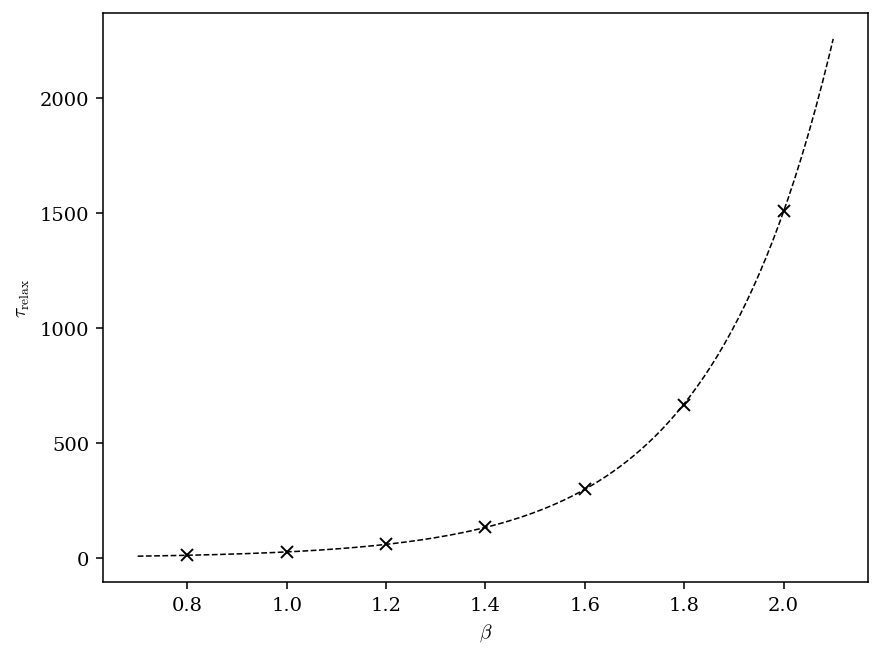

In [ ]:
print(f"τ(β) = τ_0 * exp(b*β) ≈ {tau0:.3f} * exp({b:.3f}*β)")

beta_space = np.linspace(0.7,2.1,200)
plt.plot(beta_space,tau0*np.exp(b*beta_space), "k--", lw=0.8)

plt.plot(betas,tau,"kx")

plt.xlabel(r"$\beta$")
plt.ylabel(r"$\tau_{\mathrm{relax}}$")
plt.show()


**c)** The whole prodecure can be repeated quite easily with the Metropolis update algorithm.


`see below`

**d)** In principle one could determine along similar lines the relaxation
time of the energy (which, in contrast to the magnetization, does
not approach zero but a finite equilibrium value discussed in problem 3).


/home/till/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


L = -E(0) = 2	tau = 0.001	E_inf = -1.928
L = -E(0) = 10	tau = 3.844	E_inf = -7.955
L = -E(0) = 20	tau = 5.411	E_inf = -15.285
L = -E(0) = 50	tau = 5.604	E_inf = -38.087
L = -E(0) = 100	tau = 5.666	E_inf = -76.186

τ_avg = 1.648


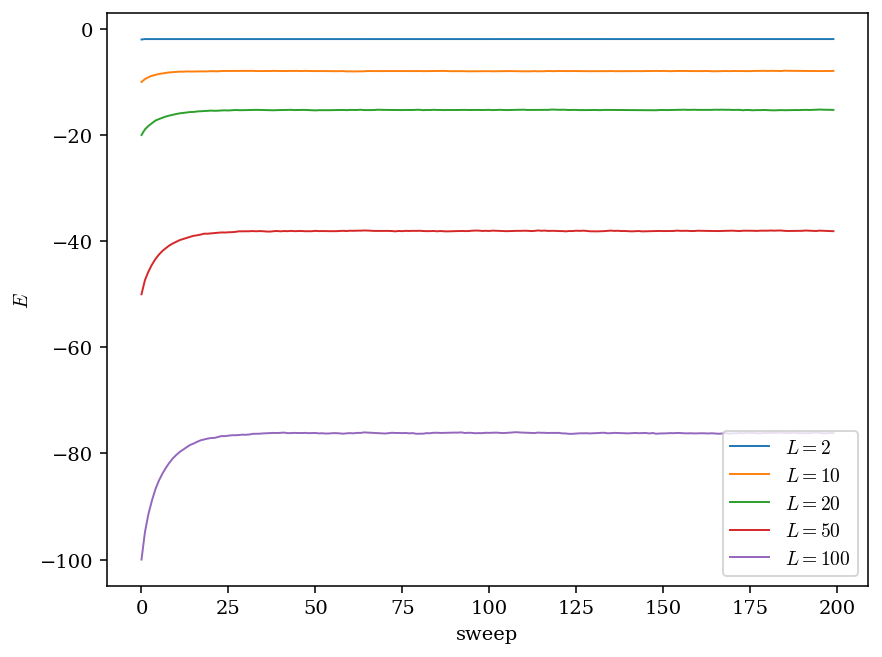

In [5]:
avg_E_series = np.loadtxt("out/avg_E_timeseries_metropolis.txt")
E_fit = lambda x,a,tau,E_inf: -a*np.exp(-x/tau) + E_inf

tau = []
E_inf = []
for L_val,series in zip(L,avg_E_series):
    _,curr_tau, curr_E_inf = curve_fit(E_fit,x,series/L_val)[0]
    tau.append(curr_tau)
    tau.append(curr_E_inf)
    print(f"L = -E(0) = {L_val}\ttau = {curr_tau:.3f}\tE_inf = {curr_E_inf*L_val:.3f}")
    plt.plot(x,series,label=rf"$L = {L_val}$", lw=1)

print(f"\nτ_avg = {sum(tau)/len(tau):.3f}")

plt.xlabel("sweep")
plt.ylabel("$E$")
plt.legend(loc=4)
plt.show()

**e)** For more details see the original paper by:
R. J. Glauber, *Time-Dependent Statistics of the Ising Model*,
J. Math. Phys. 4 (1963) 294–307.